Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                            MSE       MAE        R2
Ridge Regression   2.381709e-08  0.000124  1.000000
Gradient Boosting  4.701263e-03  0.047174  0.999949


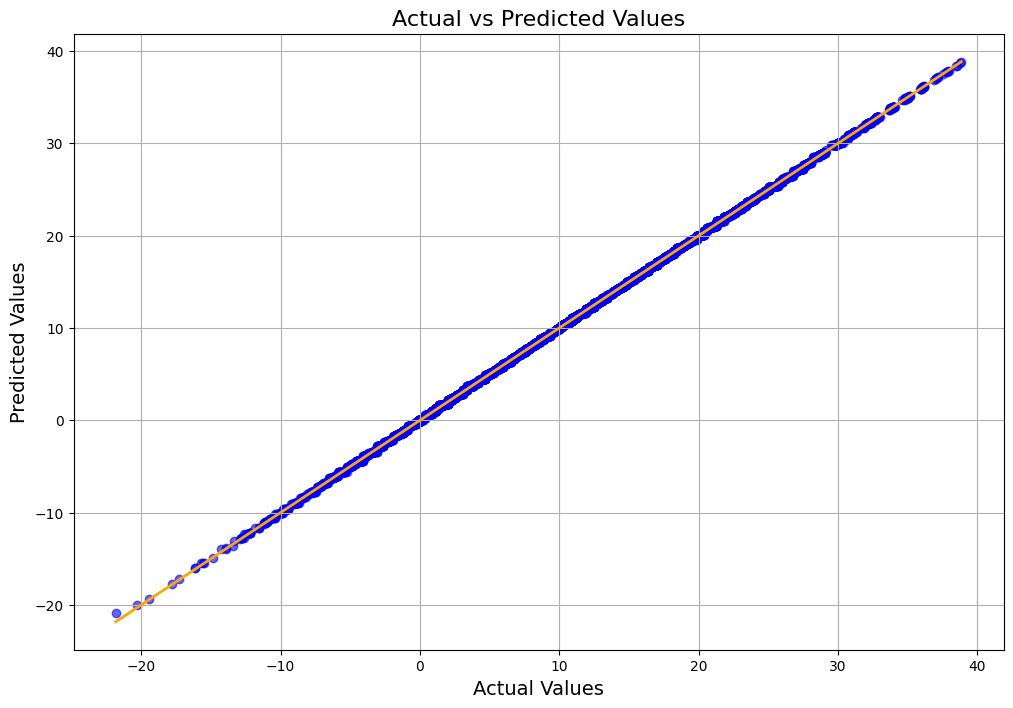

In [18]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data_path = '/content/drive/MyDrive/MIA/weatherHistory.csv'
dataset = pd.read_csv(data_path)

dataset = dataset.dropna()

features = dataset[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]
target = dataset['Temperature (C)']

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(features, target, test_size=0.15, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_set)
X_test_scaled = scaler.transform(X_test_set)

model_variants = {
    'Ridge Regression': Ridge(alpha=1.0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

evaluation_results = {}
for model_name, model_instance in model_variants.items():
    model_instance.fit(X_train_scaled, y_train_set)
    predictions = model_instance.predict(X_test_scaled)
    mse_value = mean_squared_error(y_test_set, predictions)
    mae_value = mean_absolute_error(y_test_set, predictions)
    r2_value = r2_score(y_test_set, predictions)
    evaluation_results[model_name] = {'MSE': mse_value, 'MAE': mae_value, 'R2': r2_value}

evaluation_df = pd.DataFrame(evaluation_results).T
print(evaluation_df)

optimal_model = model_variants['Gradient Boosting']
predicted_values = optimal_model.predict(X_test_scaled)

plt.figure(figsize=(12, 8))
plt.scatter(y_test_set, predicted_values, alpha=0.6, color='b')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.plot([min(y_test_set), max(y_test_set)], [min(y_test_set), max(y_test_set)], color='orange', linewidth=2)
plt.grid(True)
plt.show()


In [ ]:
1)regression problem

2)we can look at correlation coefficients and visualize the data.Correlation coefficients range from -1 to 1, where values closer to 1 or -1 indicate a stronger relationship, and values closer to 0 indicate a weaker relationship. Visualizations like pair plots help us see these relationships more clearly.

3)Loading the Dataset,Handling Missing Values,feature selection,splitting the dataset,standardizing the features

4)we can train multiple regression models and compare their performance using evaluation metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²). The model with the best metrics (lower MSE and MAE, and higher R²) is considered the best.

5)Mean squared error (MSE),Mean absolute error (MAE),R-squared (R²)